# Credit Risk Analysis

In this project i will make an analysis of credit risk using customer credit data and create a segmentation for each customer for a good credit risk and bad credit risk using machine leaning clustering model.

# Introduction

Name        : Muhamad Bagus Septian

Dataset     : Customer Credit History

Problems    : Analyzing the customer credit risk to find out the customer with good credit risk and bad credit risk

Objective   : Build a machine learning model that can cluster the credit data into a good credit risk and a bad credit risk

# External Link

# Working Area

## 1 Libraries

In [251]:
pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples
from sklearn.pipeline import make_pipeline
import joblib

## 2 Data Loading

In [253]:
# Load the dataset from csv file
df = pd.read_csv('IndonesiaCreditData.csv')

In [254]:
# Dataset overview
df

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


Dataset consist of 9 variable which is :

Variable | Definition
---|---
No | Customer number
Age | Customer age
Sex | Customer gender (mae/female)
Job | Customer occupation (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing | Customer housing Status (text: own, rent, or free)
Saving accounts | Customer saving accounts category (text - little, moderate, quite rich, rich)
Checking account | Customer checking accounts category (text - little, moderate, quite rich, rich)
Credit amount | Customer credit amount (IDR)
Duration | Customer credit duration in month
Purpose | Customer credit purpose

In [255]:
# Checkin the dataset shape and columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


* Dataset consist of 1000 rows and 10 columns
* Dataset consisst of 5 numerical columns and 5 categorical columns
* There are missing values in saving accounts column and checking account column

In [256]:
df.describe()

,No,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,35.546000,1.904000,4.056033e+07,20.903000
std,288.819436,11.375469,0.653614,3.499911e+07,12.058814
min,0.000000,19.000000,0.000000,3.099750e+06,4.000000
25%,249.750000,27.000000,2.000000,1.693083e+07,12.000000
50%,499.500000,33.000000,2.000000,2.875948e+07,18.000000
75%,749.250000,42.000000,2.000000,4.925193e+07,24.000000
max,999.000000,75.000000,3.000000,2.284392e+08,72.000000


We can see that the average customer age are on 35 years which means most of the customers are on a productive age. The credit amount range from 3 millions to 200 millions and the average credit duration are 20 months

## 3 Exploratory Data Analysis

Text(0.5, 1.0, 'Age Distributions')

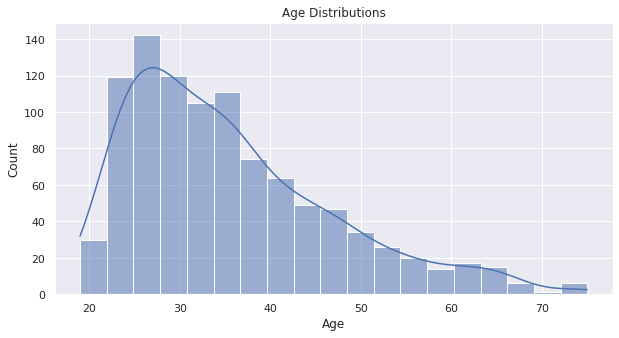

In [257]:
# Visualize age distribution
sns.set()
plt.figure(figsize=(10,5))
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distributions')

The age distribution are positively skewed with most of the customer age below 40 years

Text(0.5, 1.0, 'Credit Amount Distributions')

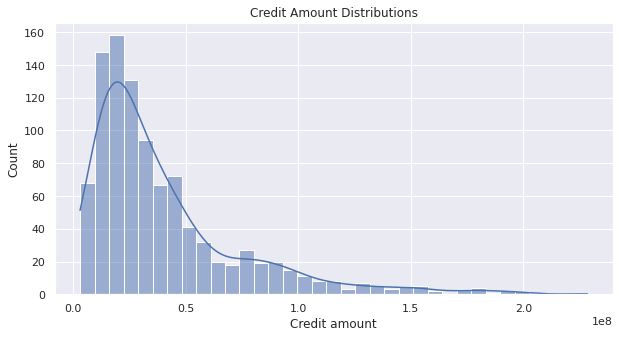

In [258]:
# Visualize crdit amount distribution
sns.set()
plt.figure(figsize=(10,5))
sns.histplot(x='Credit amount', data=df, kde=True)
plt.title('Credit Amount Distributions')

Credit amount distribution also found to be positively skewed with most of the amount below 100 millions

Text(0.5, 1.0, 'Duration Distributions')

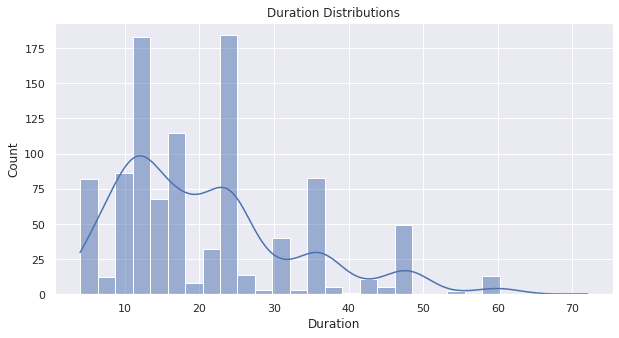

In [259]:
# Visualize duration distribution
sns.set()
plt.figure(figsize=(10,5))
sns.histplot(x='Duration', data=df, kde=True)
plt.title('Duration Distributions')

Duration of credit found to be positively skewed with most of the credit duration below 25 months

Text(0.5, 1.0, 'Sex Proportion')

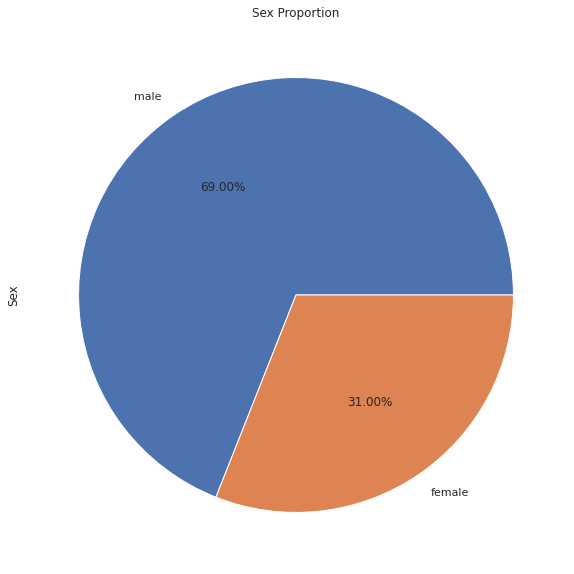

In [260]:
# Visualize sex proportions
df['Sex'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Sex Proportion')

Most of the credit customer are male with proportion of 69%

Text(0.5, 1.0, 'Job Proportion')

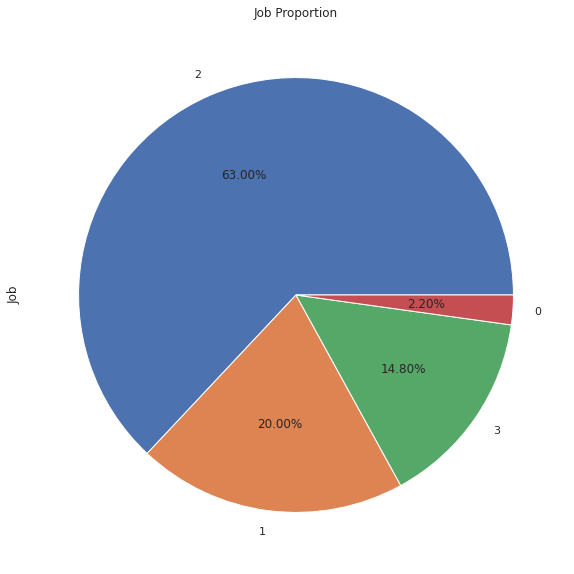

In [261]:
# Visualize sex proportions
df['Job'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Job Proportion')

Ctegories of job that most frequently found are 2 which is a skilled category

Text(0.5, 1.0, 'Saving accounts Proportion')

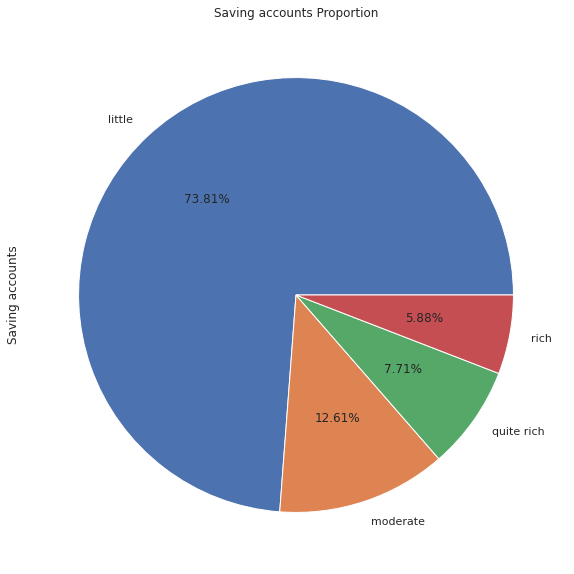

In [262]:
# Visualize sex proportions
df['Saving accounts'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Saving accounts Proportion')

Most of the customer have little saving accounts category

Text(0.5, 1.0, 'Checking accounts Proportion')

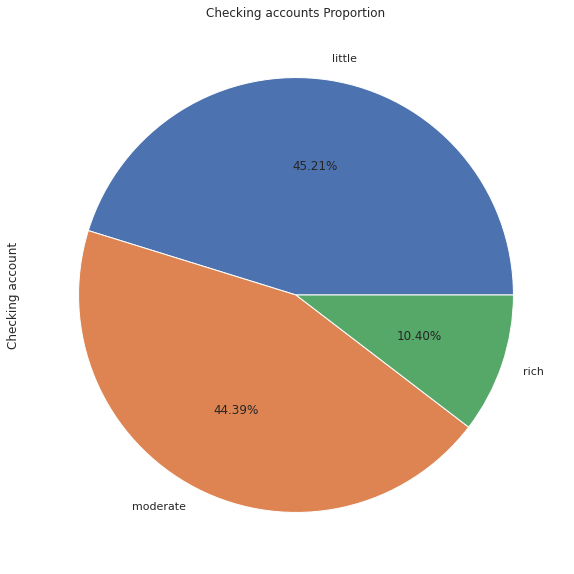

In [263]:
# Visualize sex proportions
df['Checking account'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Checking accounts Proportion')

Customer found tobe almost equally proportioned between little category with 45.21% and moderate with 44.39%. Only 10.30% of customer have rich checking account category

Text(0.5, 1.0, 'Purpose Proportion')

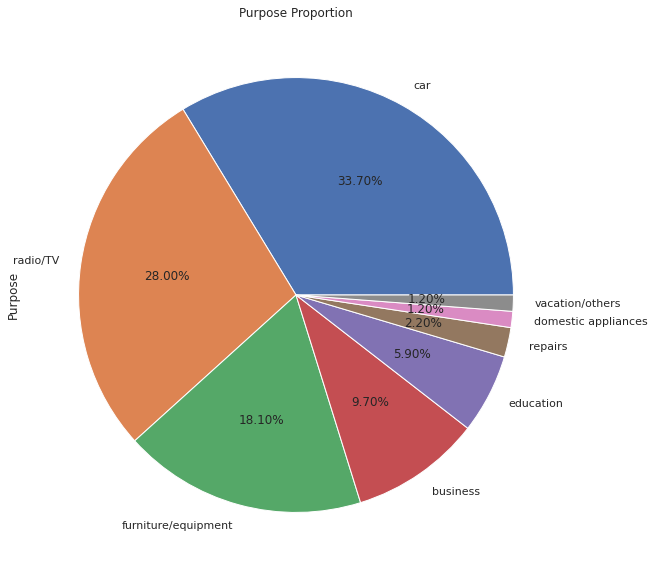

In [264]:
# Visualize sex proportions
df['Purpose'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Purpose Proportion')

Three of the most popular purpose of credit are car, radio/TV and furniture/equipment

Text(0.5, 1.0, 'Lineplot between Age and Credit Amount')

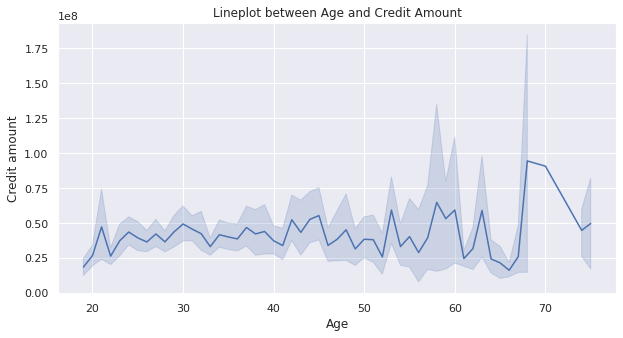

In [265]:
# Checking the corelation between age and credit amount
plt.figure(figsize=(10,5))
sns.lineplot(x='Age', data=df, y='Credit amount')
plt.title('Lineplot between Age and Credit Amount')

There does'nt seem to be a strong corellation between age and credit amount from the quite stagnant line in the visualization.

Text(0.5, 1.0, 'Lineplot between Age and Duration')

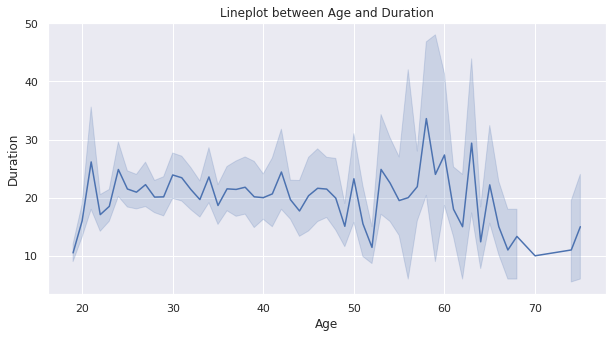

In [266]:
# Checking the corelation between age and duration
plt.figure(figsize=(10,5))
sns.lineplot(x='Age', data=df, y='Duration')
plt.title('Lineplot between Age and Duration')

Based on the visualization there wasn't a clear trend of pattern between age and duration

Text(0.5, 1.0, 'Lineplot between Age and Duration')

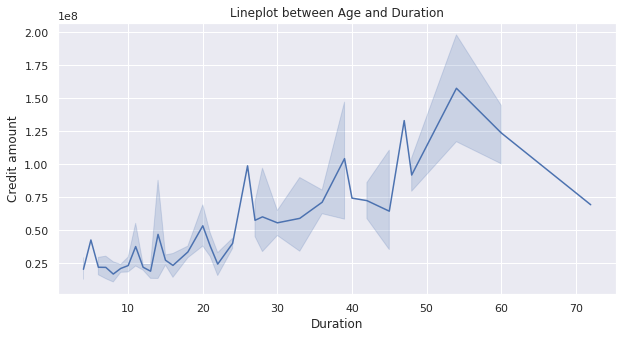

In [267]:
# Checking the corelation between age and duration
plt.figure(figsize=(10,5))
sns.lineplot(x='Duration', data=df, y='Credit amount')
plt.title('Lineplot between Age and Duration')

We can see from the visualization there's a rising trend between credit amount and duration, so there might be strong corelation between duration and credit amount.

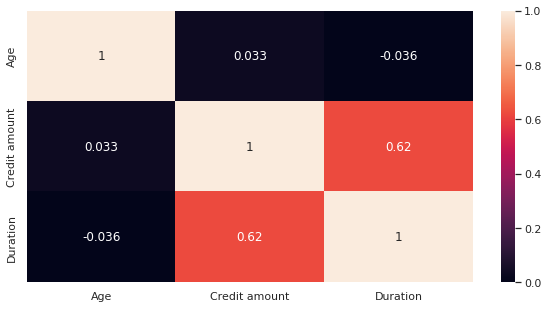

In [268]:
df_num  = df[['Age', 'Credit amount', 'Duration']]
corr = df_num.corr()


plt.figure(figsize=(10,5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

From the heatmap we can see there's a quite strong corellation between credit amount and duration.

## 4 Data Preprocessing

In [269]:
# Make copy of raw data to help data checking if needed
df_copy = df.copy()

### 4.1 Handling Duplicate Data

In [270]:
# Checking duplicate data
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose


There are no duplicate data in the dataset

### 4.2 Handling Cardinality

In [271]:
print('Number of categories in the variable Sex                 : {}'.format(len(df['Sex'].unique())))
print('Number of categories in the variable Job                 : {}'.format(len(df['Job'].unique())))
print('Number of categories in the variable Housing             : {}'.format(len(df['Housing'].unique())))
print('Number of categories in the variable Saving accounts     : {}'.format(len(df['Saving accounts'].unique())))
print('Number of categories in the variable Checking account	: {}'.format(len(df['Checking account'].unique())))
print('Number of categories in the variable Purpose	            : {}'.format(len(df['Purpose'].unique())))

Number of categories in the variable Sex                 : 2
Number of categories in the variable Job                 : 4
Number of categories in the variable Housing             : 3
Number of categories in the variable Saving accounts     : 5
Number of categories in the variable Checking account	: 4
Number of categories in the variable Purpose	            : 8


The categorical columns on the dataset have classes ranging between 2 and 8 classes. That amount of classes can be considered low cardinality so there are no high cardinality found in the dataset. 

### 4.3 Handling Missing Value

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [273]:
# Checking the proportion of missing value
df.isna().sum()/len(df)

No                  0.000
Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
dtype: float64

There are missing value found in checking accounts and saving account columns with proportion of 18.3% and 39.4%. This proportion are quite large. Missing values for both of these columns might happen because the customer might not have any saving or checking accounts registered. With that consideration we will handle the missing values by inputing it with "none"

In [274]:
# Filling the missing value with mode
df['Saving accounts'].fillna('none', inplace=True)
df['Checking account'].fillna('none', inplace=True)

### 4.4 Get Inference Data

In [275]:
# Taking 10 data at random for model inference
data_inf = df.sample(10, random_state=37)
data_inf 

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
982,982,28,female,3,own,moderate,rich,36242277,21,car
697,697,38,female,0,own,little,none,11481474,12,car
11,11,24,female,2,rent,little,little,53414892,48,business
604,604,23,female,2,own,little,rich,15808725,10,furniture/equipment
647,647,26,female,2,own,quite rich,none,17185014,12,car
489,489,26,male,2,rent,little,none,43619682,6,car
558,558,27,male,2,own,little,little,44041248,24,furniture/equipment
591,591,42,female,2,rent,none,moderate,24364035,24,car
487,487,62,female,2,free,little,none,46583043,24,car
160,160,36,male,2,own,moderate,none,35609928,24,radio/TV


In [276]:
# Split data train and data inference
data_train = df.drop(data_inf.index)

In [277]:
# Reset index for data train and data inference
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,982,28,female,3,own,moderate,rich,36242277,21,car
1,697,38,female,0,own,little,none,11481474,12,car
2,11,24,female,2,rent,little,little,53414892,48,business
3,604,23,female,2,own,little,rich,15808725,10,furniture/equipment
4,647,26,female,2,own,quite rich,none,17185014,12,car
5,489,26,male,2,rent,little,none,43619682,6,car
6,558,27,male,2,own,little,little,44041248,24,furniture/equipment
7,591,42,female,2,rent,none,moderate,24364035,24,car
8,487,62,female,2,free,little,none,46583043,24,car
9,160,36,male,2,own,moderate,none,35609928,24,radio/TV


### 4.5 Handling Outliers

In [278]:
# Define a function of boxplot and histograms to check outliers
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

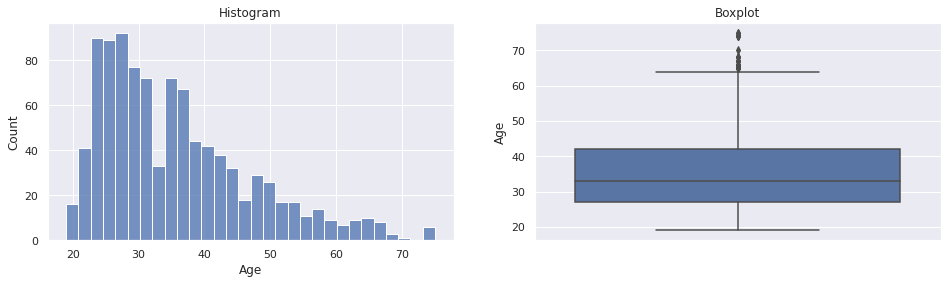

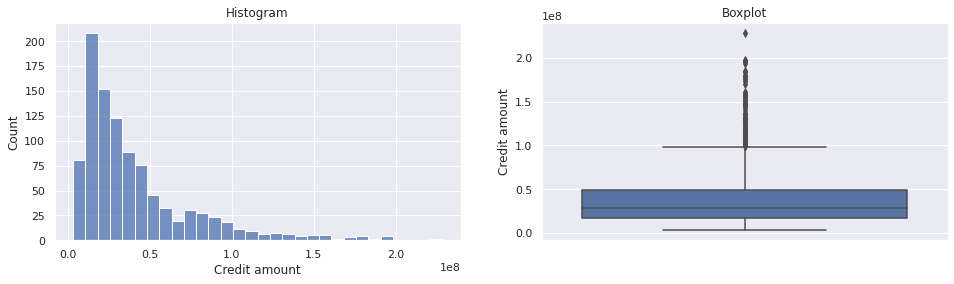

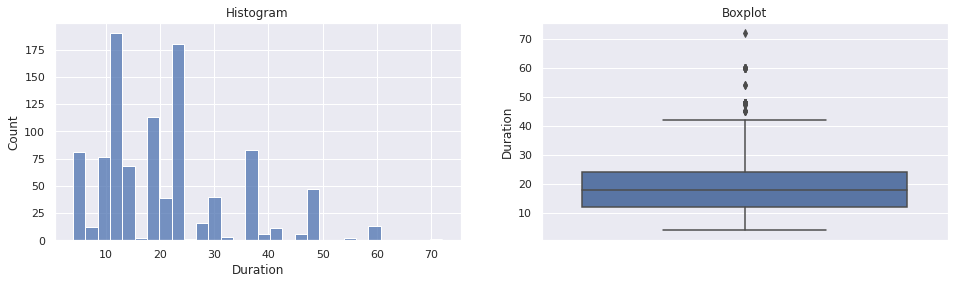

In [279]:
diagnostic_plots(data_train, 'Age')
diagnostic_plots(data_train, 'Credit amount')
diagnostic_plots(data_train, 'Duration')

There was outliers found in the dataset for each numerical variabel. Since all of the numerical variable has skewed distribution we will use IQR capping to handle the outlier.

In [280]:
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, 
                        variables=['Age', 'Credit amount', 'Duration'])

winsorizer.fit(data_train)

data_train_cap = winsorizer.transform(data_train)

### 4.6 Feature Selection

In [281]:
# We will only use the numerical variaables for the model clustering
num_cols = ['Age', 'Credit amount','Duration']

data_train_num = data_train_cap[num_cols]

### 4.7 Feature Scaling

In [282]:
# Scaling the numerical variable with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train_num)

data_train_final = scaler.transform(data_train_num)
data_train_final

array([[0.85714286, 0.07951547, 0.03571429],
       [0.05357143, 0.49327277, 0.78571429],
       [0.53571429, 0.15972312, 0.14285714],
       ...,
       [0.33928571, 0.04793424, 0.14285714],
       [0.07142857, 0.13800562, 0.73214286],
       [0.14285714, 0.3743024 , 0.73214286]])

### 4.8 Dimension Reduction

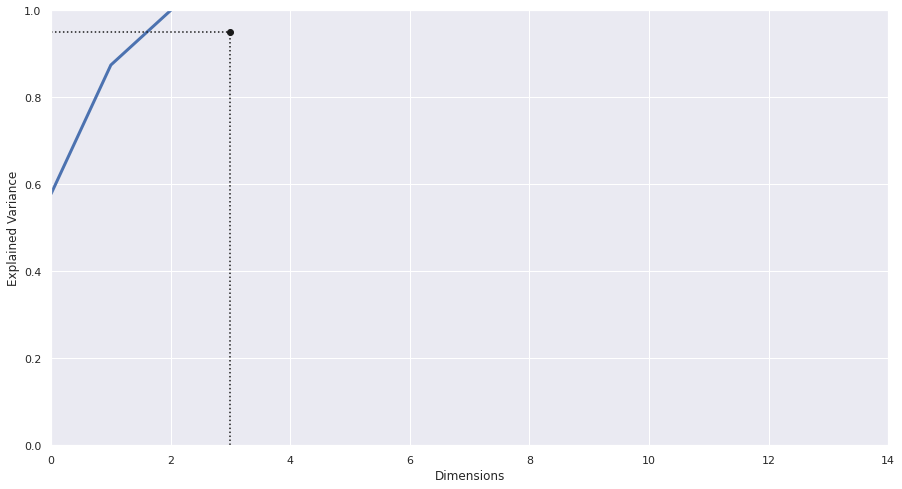

In [283]:
# Dimension Reduction with PCA
pca = PCA()
pca.fit(data_train_final)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(15,8))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

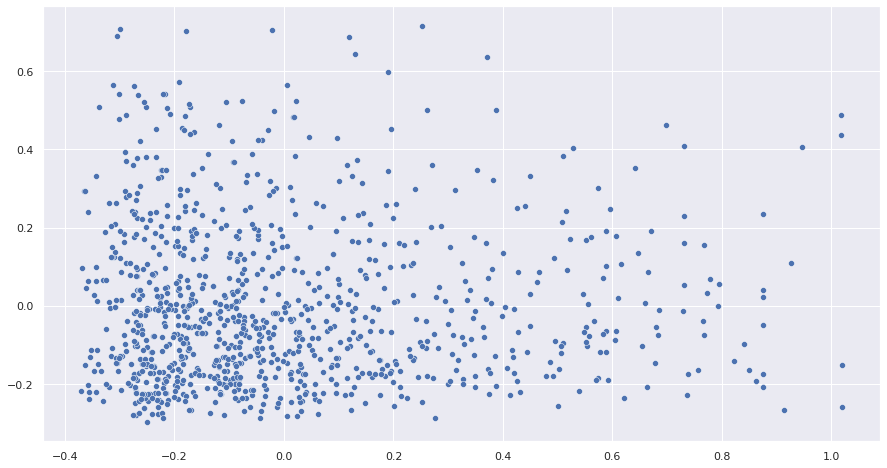

In [284]:
pca_red = PCA(n_components=3).fit_transform(data_train_final)
plt.figure(figsize=(15,8))
sns.scatterplot(x=pca_red[:,0],y=pca_red[:,1])

## 6 Model Definition

In [285]:
kmeans = KMeans()
spectral = SpectralClustering()

## 7 Model Training

In [286]:
kmeans.fit(data_train_final)

KMeans()

In [287]:
spectral.fit(data_train_final)

SpectralClustering()

## 8 Model Evaluation

Model evaluation will be conducted with 2 steps. FIrst we are going to evaluate the ideal cluster amount for each model with Silhouette SCore. The second step is to identify model with the best clustering with Calinski_Harabasz Score

In [288]:
# Define function for silhouette score visualization
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

### 8.1 K-Means Evaluation

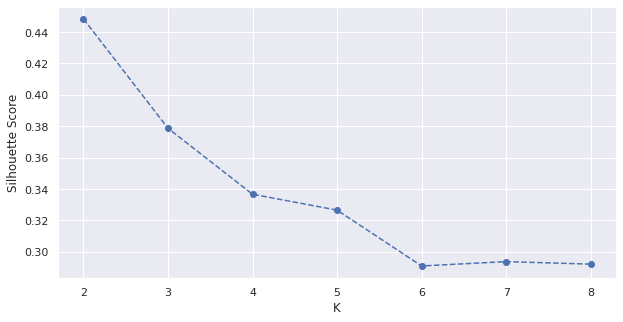

In [289]:
# KMeans Silhouette Score line graph
K=[2,3,4,5,6,7,8]
s_score_slc=[silhouette_score(data_scaled, KMeans(n_clusters=i).fit(data_scaled).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.44843245531526693
For n_clusters = 3 The average silhouette_score is : 0.37864824093665994
For n_clusters = 4 The average silhouette_score is : 0.3349296457313729
For n_clusters = 5 The average silhouette_score is : 0.3190967858873859
For n_clusters = 6 The average silhouette_score is : 0.29058613182089094
For n_clusters = 7 The average silhouette_score is : 0.29310839019076396
For n_clusters = 8 The average silhouette_score is : 0.2866917986014593


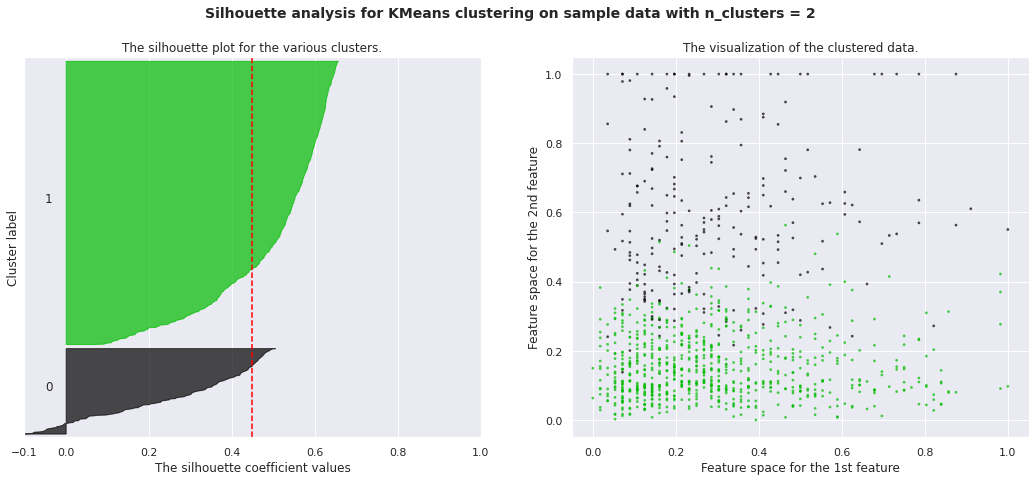

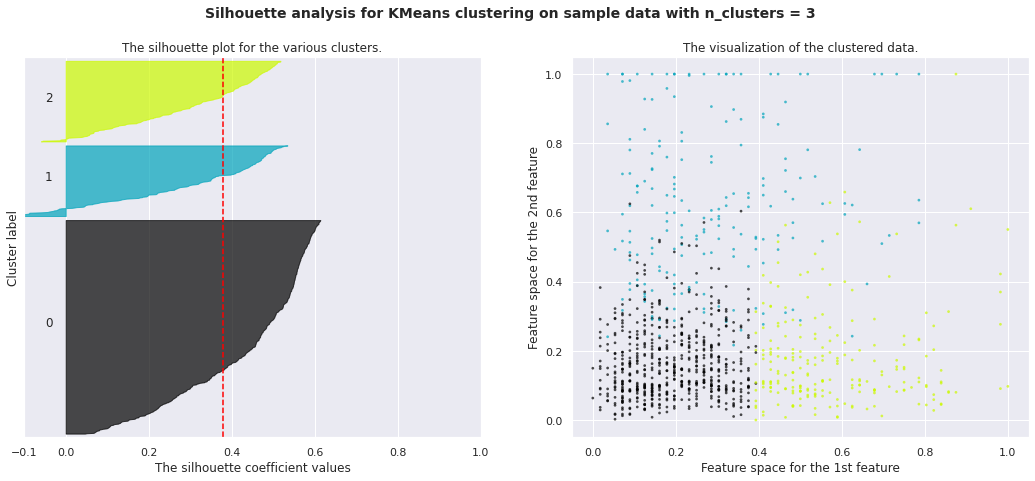

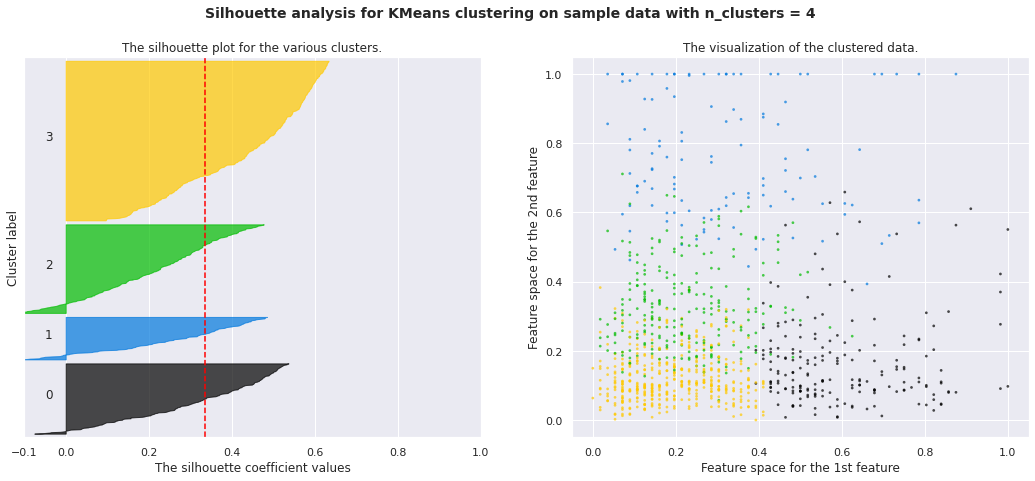

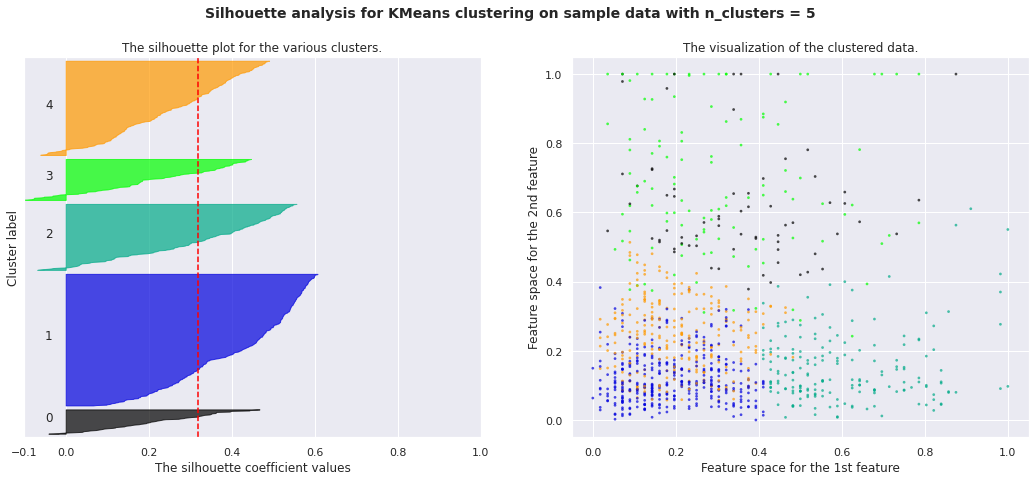

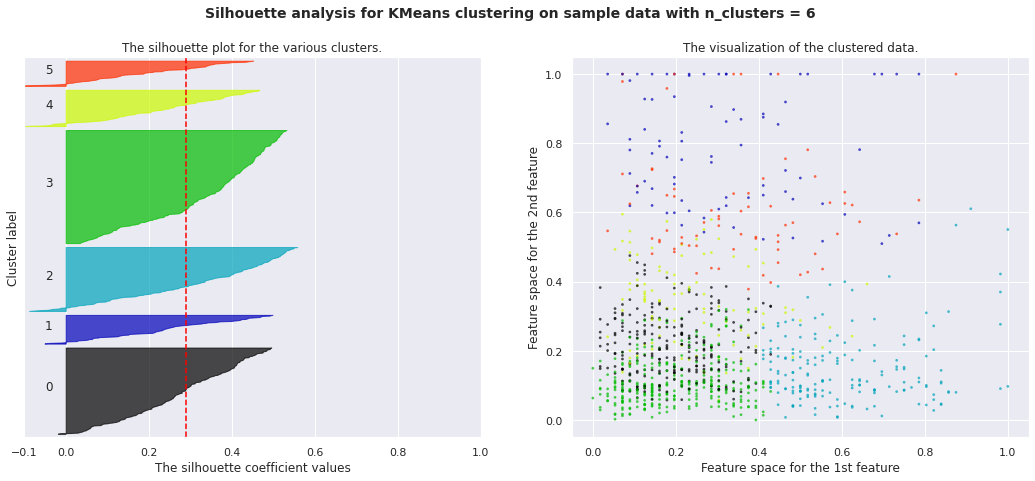

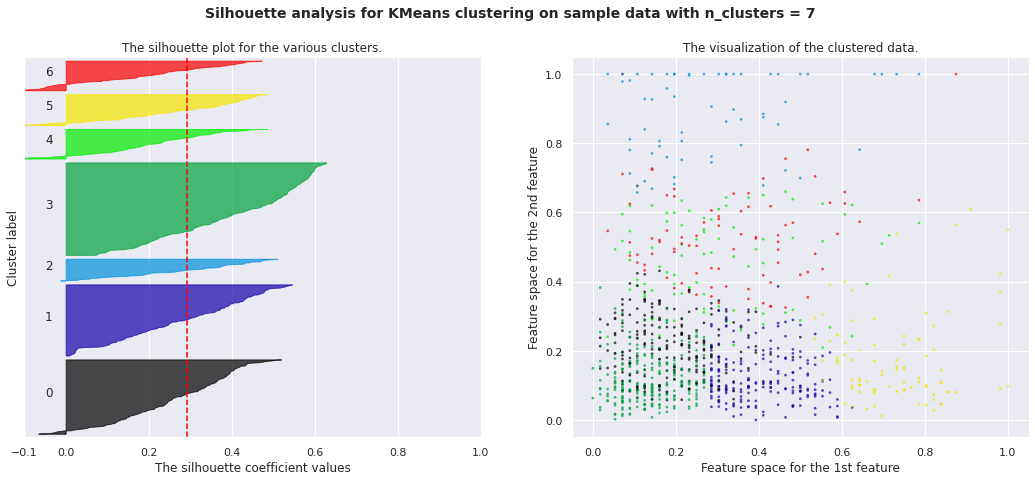

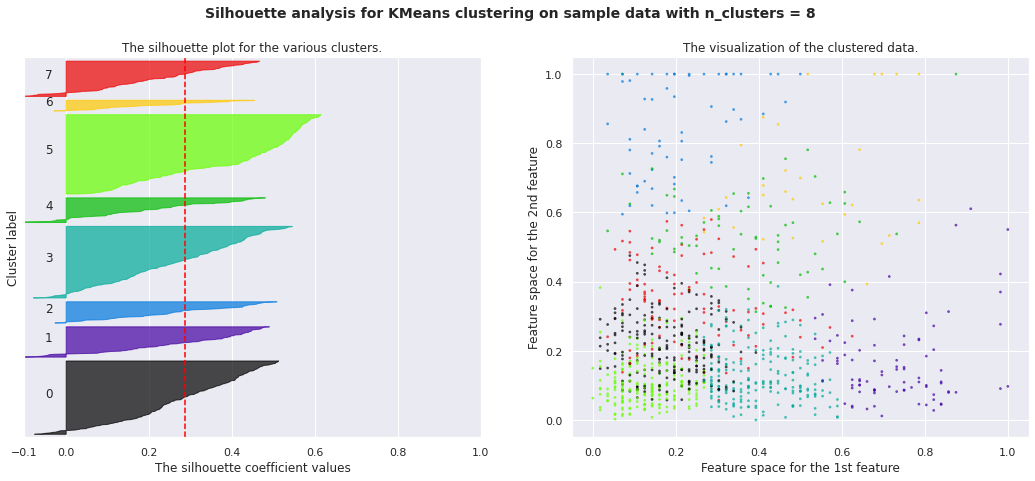

In [290]:
# Visualizing KMeans Silhouette Score with each hypothecical cluster
plot_silhouette(KMeans,K,data_scaled,'KMeans')

From the silhouette score result and visualization we can see that the best score are when the cluster amount are 3 and the second best is 2 cluster. When we see the overlapping visualization we can see that there are more overlapping that happen in 3 cluster compared to 2 cluster. Considering that result we are going to use 2 cluster amount for KMeans model.

In [291]:
# Setting model KMeans to create 2 cluster
kmeans_tune = KMeans(n_clusters=2, random_state=50)
kmeans_tune.fit(data_train_final)

KMeans(n_clusters=2, random_state=50)

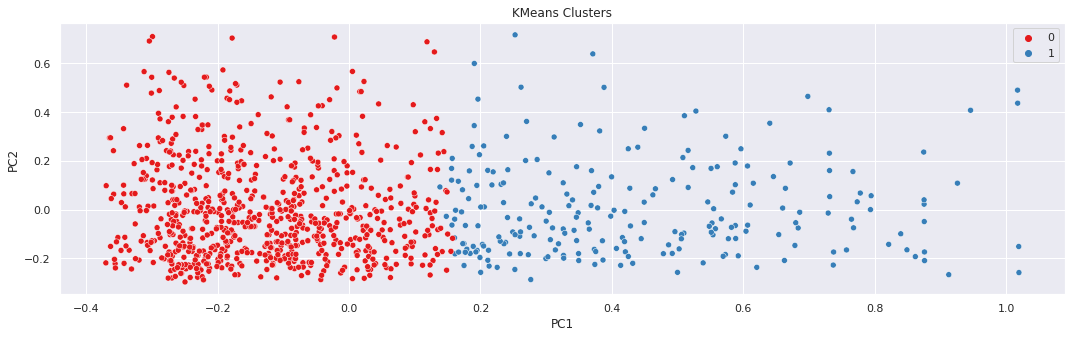

In [292]:
# KMeans Cluster result visualization
plt.figure(figsize=(18, 5))
sns.scatterplot(x=pca_red[:, 0], y=pca_red[:, 1], hue=kmeans_tune.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [293]:
# Adding the cluster result to train dataframe
data_train['kmeans'] = kmeans_tune.fit_predict(data_train_final)
data_train

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,kmeans
0,0,67,male,2,own,none,little,14494431,6,radio/TV,0
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,1
2,2,49,male,1,own,little,none,25988304,12,education,0
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,1
4,4,53,male,2,free,little,little,60383130,24,car,0
...,...,...,...,...,...,...,...,...,...,...,...
985,995,31,female,1,own,little,none,21524664,12,furniture/equipment,0
986,996,40,male,3,own,little,little,47822943,30,car,0
987,997,38,male,2,own,little,none,9968796,12,radio/TV,0
988,998,23,male,2,free,little,little,22876155,45,radio/TV,1


Text(0.5, 1.0, 'Cluster Proportion')

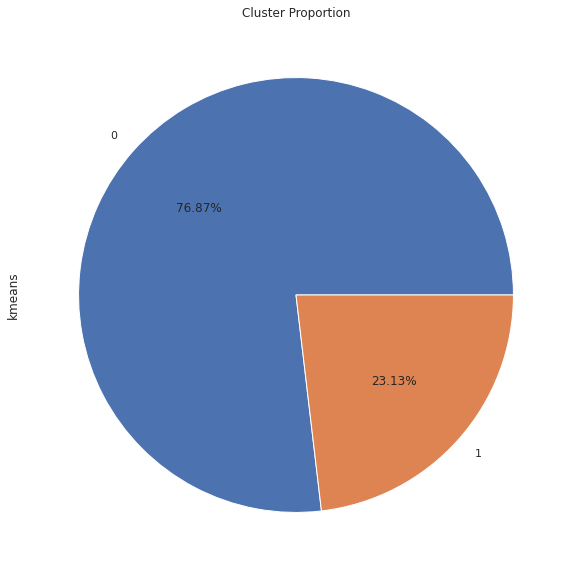

In [294]:
# Visualize the cluster result proportion
data_train['kmeans'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Cluster Proportion')

KMeans model cluster the data with 76.87% for cluster 0 and 23.13% for cluster 1


### 8.2 Spectral Clustering Evaluation

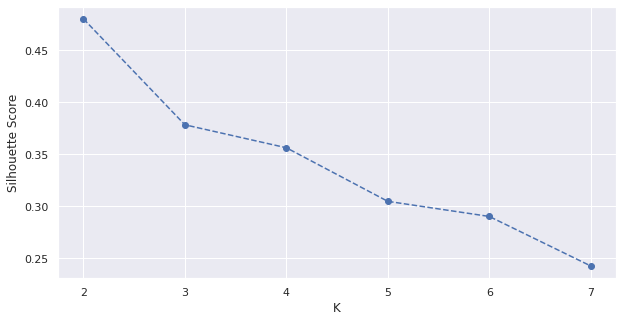

In [295]:
# Spectral Clustering Silhouette Score line graph
K=[2,3,4,5,6,7]
s_score_slc=[silhouette_score(data_train_final, SpectralClustering(n_clusters=i).fit(data_train_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.48015026512509423
For n_clusters = 3 The average silhouette_score is : 0.37834038403993087
For n_clusters = 4 The average silhouette_score is : 0.3562767829483171
For n_clusters = 5 The average silhouette_score is : 0.3044441976758084
For n_clusters = 6 The average silhouette_score is : 0.29131312161258155
For n_clusters = 7 The average silhouette_score is : 0.24062146439952614


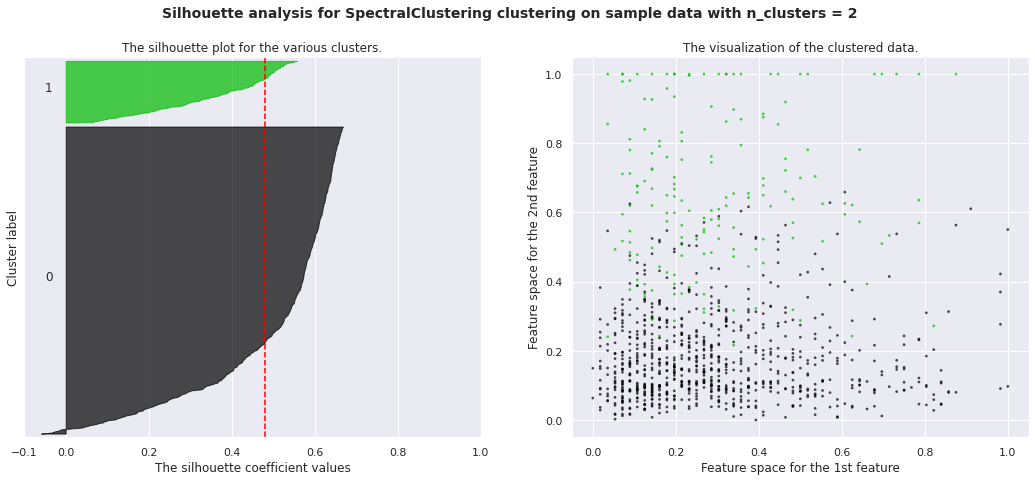

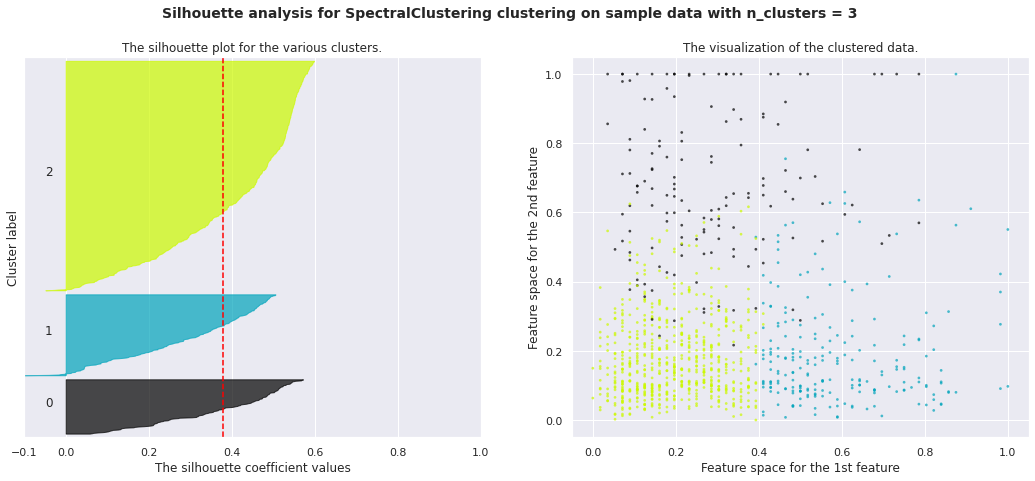

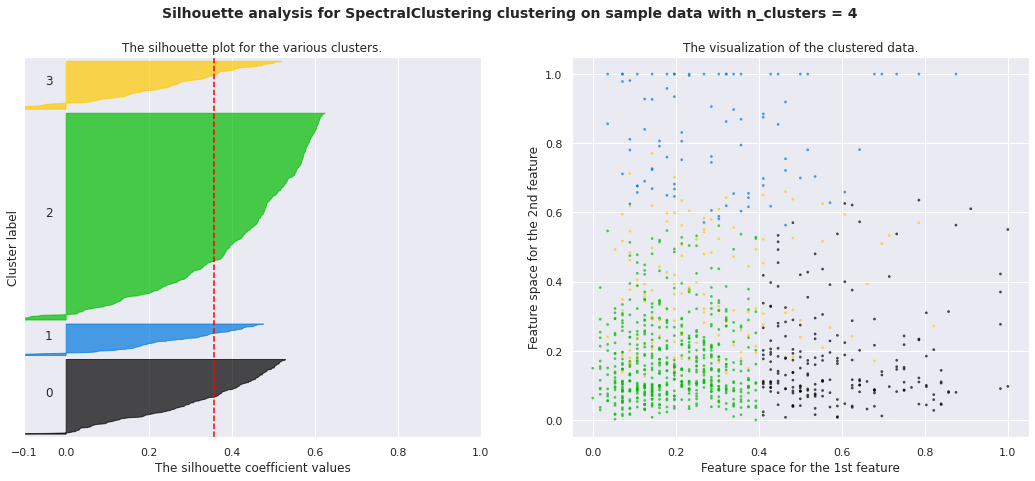

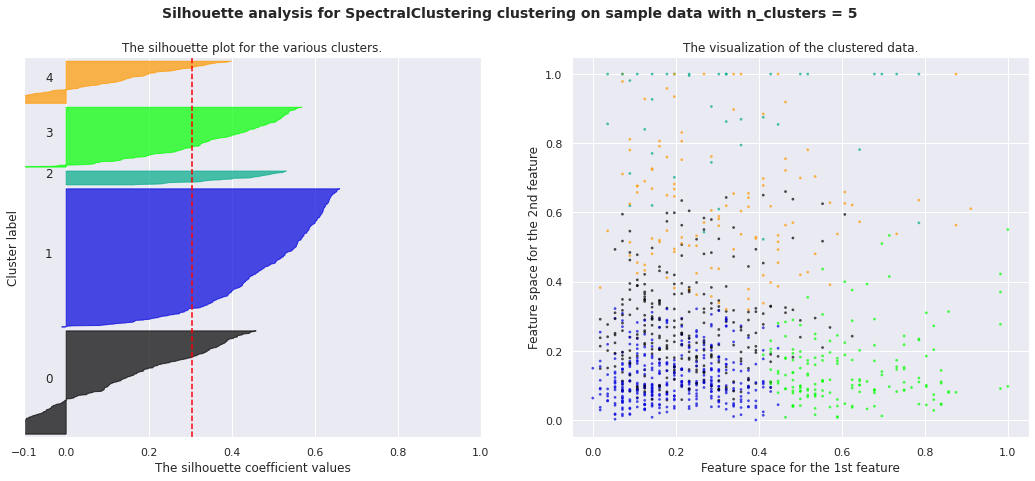

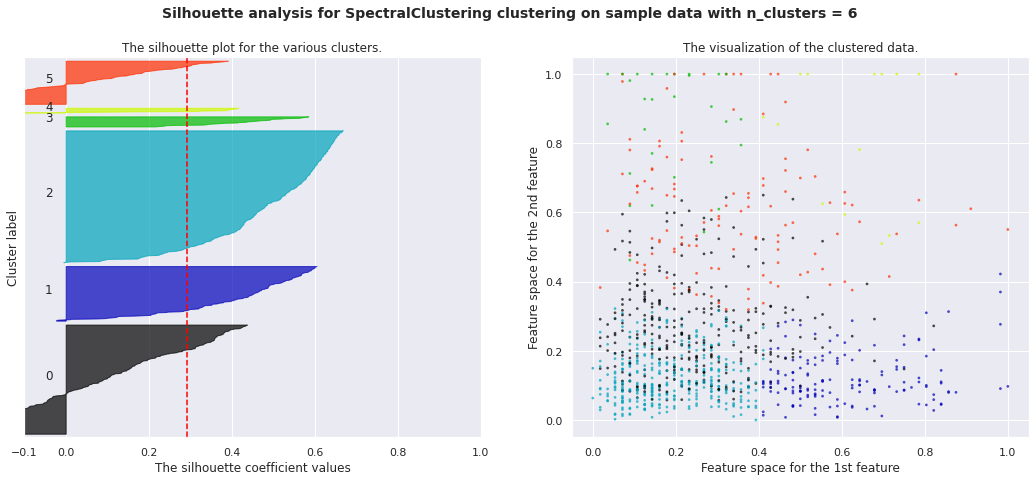

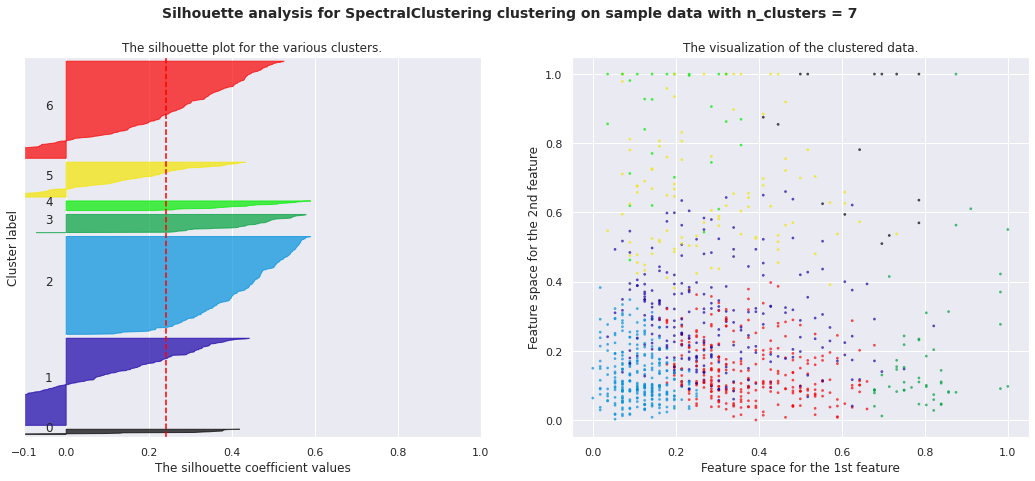

In [296]:
# Silhouette Score visualization with each hypothetical cluster amount
plot_silhouette(SpectralClustering,K,data_train_final,'SpectralClustering')

We can see the silhouette score result the best score are found with 6 cluster amount. But when we see the visualization, we can see ther are much overlapping happen between the cluster. Seeing the other cluster amount visualization score we can see that there are overlapping in every cluster amount. So for the Spectral Clustering model we are going to create 6 cluster because it has the hisgest score.

In [297]:
# Tarining Spectral Clustering model to create 6 cluster
sc_tune = SpectralClustering(n_clusters=2)
sc_tune.fit(data_train_final)

SpectralClustering(n_clusters=2)

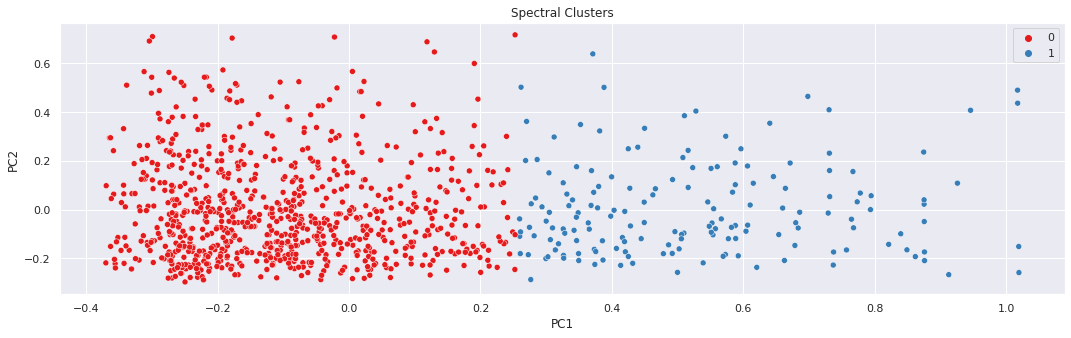

In [298]:
# Spectral Model cluster result visualization
plt.figure(figsize=(18, 5))
sns.scatterplot(x=pca_red[:, 0], y=pca_red[:, 1], hue=sc_tune.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clusters')
plt.show()

In [299]:
# Adding Specatral Clustering result to train dataframe
data_train['spectral'] = sc_tune.fit_predict(data_train_final)
data_train

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,kmeans,spectral
0,0,67,male,2,own,none,little,14494431,6,radio/TV,0,1
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,1,0
2,2,49,male,1,own,little,none,25988304,12,education,0,1
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,1,0
4,4,53,male,2,free,little,little,60383130,24,car,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
985,995,31,female,1,own,little,none,21524664,12,furniture/equipment,0,1
986,996,40,male,3,own,little,little,47822943,30,car,0,1
987,997,38,male,2,own,little,none,9968796,12,radio/TV,0,1
988,998,23,male,2,free,little,little,22876155,45,radio/TV,1,1


Text(0.5, 1.0, 'Cluster Proportion')

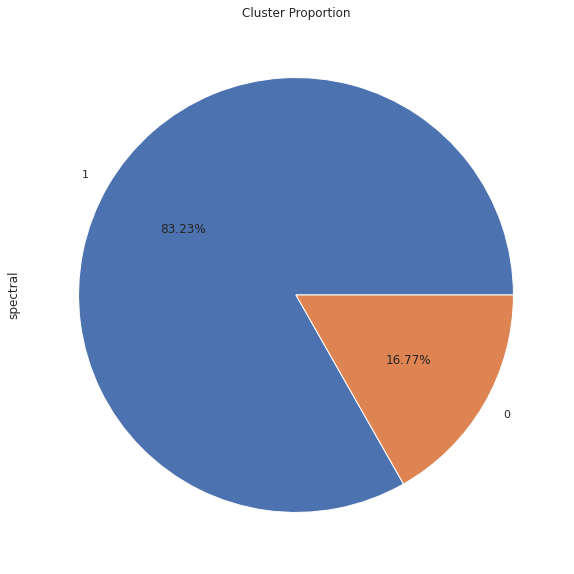

In [300]:
# Visualizing Cluster Proportion
data_train['spectral'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Cluster Proportion')

The bigest cluster proportion are cluster 0 with 82.23% and cluster 1 with 16.77%




### 8.4 Calinski-Harabasz Score
We will compare each of the clustering model result with Calinski-Harabasz Score

In [301]:
# Computing Calinski-Harabasz Score for each model clustering result
modellist = kmeans_tune,sc_tune
score = []
model = []
for x in modellist:
  labels = x.labels_
  y = calinski_harabasz_score(data_train_final, labels)
  score.append(y)
  model.append(str(x))


result = pd.DataFrame(data=zip(score, model), columns=['score','model'])
result

,score,model
0,675.696340,"KMeans(n_clusters=2, random_state=50)"
1,41.933865,DBSCAN(eps=0.2)
2,645.383759,SpectralClustering(n_clusters=2)


Clustering result with the highest score found to be KMeans Model. We can conlude from this result that KMeans clustering model perform the best clustering for this dataset. So we will use the KMeans clustering result to analyze costumer credit risk

### 8.5 Cluster EDA

In [302]:
# Droping all the other model clustering result
data_eda = data_train.drop(columns=['spectral'], axis=1)

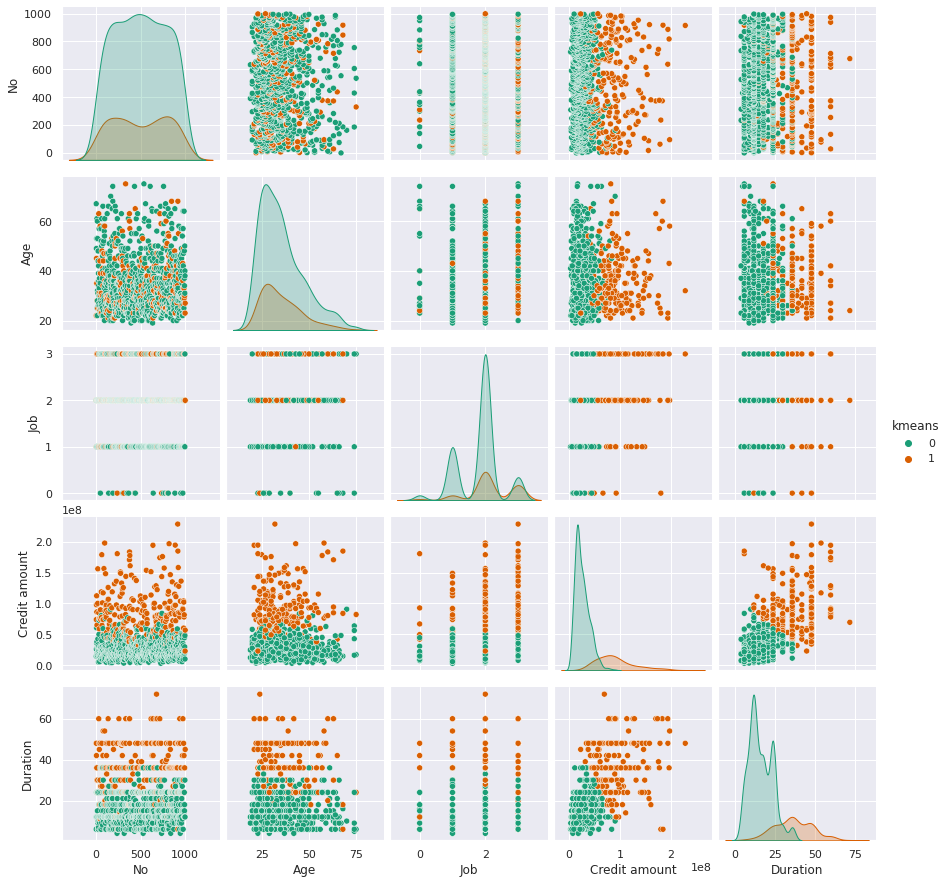

In [303]:
# Create pairplot to see corelation
sns.pairplot(data_eda,hue='kmeans',palette='Dark2')

From the pairplot we can see the most distinct feature of cluster 0 are lower duration and lower credit amount, while cluster 2 feature have higher duration and higher credit amount. Customer with higher credit amount and higher duration might impose a higher credit risk compared to customer with lower duration and lower credit amount. So we will asingn "good" risk to cluster 0 with lower credit amount and duration and "bad" risk for cluster 1 with higher duration and higher credit amount.

In [304]:
data_train['Risk'] = data_train['kmeans'].apply(lambda val : 'Good' if val ==  0 else 'Bad')
data_train.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,kmeans,spectral,Risk
0,0,67,male,2,own,none,little,14494431,6,radio/TV,0,1,Good
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV,1,0,Bad
2,2,49,male,1,own,little,none,25988304,12,education,0,1,Good
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment,1,0,Bad
4,4,53,male,2,free,little,little,60383130,24,car,0,1,Good


## 9 Model Inference

In [320]:
# Saving model
with open('kmeans_tune_model.pkl', 'wb') as file_1:
  joblib.dump(kmeans_tune, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

In [321]:
# Loading model
with open('kmeans_tune_model.pkl', 'rb') as file_1:
  credit_risk = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  scaler = joblib.load(file_2)

In [322]:
# Split numerical feature
data_inf_num = data_inf[num_cols]

In [323]:
# Scaling the numerical feature
data_inf_scaled = scaler.transform(data_inf_num)
data_inf_scaled

array([[0.16071429, 0.23127839, 0.30357143],
       [0.33928571, 0.05849016, 0.14285714],
       [0.08928571, 0.351114  , 0.78571429],
       [0.07142857, 0.088687  , 0.10714286],
       [0.125     , 0.09829115, 0.14285714],
       [0.125     , 0.28276011, 0.03571429],
       [0.14285714, 0.28570193, 0.35714286],
       [0.41071429, 0.14838849, 0.35714286],
       [0.76785714, 0.30343933, 0.35714286],
       [0.30357143, 0.22686567, 0.35714286]])

In [325]:
# Make prediction with loaded model
cluster_pred = kmeans_tune.fit_predict(data_inf_scaled)

# Add the prediction to data inference dataframe
data_inf['pred'] = cluster_pred

# Overview Inference result
data_inf

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,pred
0,982,28,female,3,own,moderate,rich,36242277,21,car,1
1,697,38,female,0,own,little,none,11481474,12,car,0
2,11,24,female,2,rent,little,little,53414892,48,business,1
3,604,23,female,2,own,little,rich,15808725,10,furniture/equipment,0
4,647,26,female,2,own,quite rich,none,17185014,12,car,0
5,489,26,male,2,rent,little,none,43619682,6,car,0
6,558,27,male,2,own,little,little,44041248,24,furniture/equipment,1
7,591,42,female,2,rent,none,moderate,24364035,24,car,1
8,487,62,female,2,free,little,none,46583043,24,car,1
9,160,36,male,2,own,moderate,none,35609928,24,radio/TV,1


We found that the inference result consistent with previous findings with cluster 0 feature have lower duration and credit amount and cluster 1 with higher duration and credit amount

## Conclusion

* We found that most of the customers are on a productive age. So we can conclude that most costumer has a high probability of paying bak their credit.

* Most of the customer have little category for both Saving account and checking account so we can conclude that most of the customer doesn't have a high income.

* Most of the customer have low duration of credit

* Most of the customer come from skilled job category which means most of the customers have a decent paying jobs

* Most of the customer have lower amount of credit

* From the model clustering result we found that the best clustering was done by KMeans Model evaluated with Calinski-Harabasz Score.

* The clustering result group the customer based on the value of their credit amout and duration. Customer with lower credit amount and lower duration was grouped as good risk. Meanwhile customer with higher amount and duration was group as bad risk.

* From the clustering result we can conclude that the majority of the credit customer have good credit risk with proportion of 76.87%
